In [ ]:
#https://www.kaggle.com/code/jyotsnapathak/heartattackanalysisandprediction/data?select=heart.csv
#https://stackoverflow.com/questions/38913965/make-the-size-of-a-heatmap-bigger-with-seaborn
#seaborn Lineplot, scatterplot, heatmap, pairplot, barplot
#https://seaborn.pydata.org/index.html
#https://seaborn.pydata.org/generated/seaborn.lineplot.html
#https://seaborn.pydata.org/generated/seaborn.scatterplot.html
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
#https://seaborn.pydata.org/generated/seaborn.barplot.html
#https://seaborn.pydata.org/generated/seaborn.catplot.html
#https://www.w3schools.com/colors/colors_picker.asp
#heart.csv

In [ ]:
#output: 1 is risk
#output: 0 is not at risk
#cp: Chest Pain
#trtbps : resting blood pressure
#chol: cholesterol 
#fbs: fasting blood sugar
#rest ecg: An ECG (electrocardiogram) records the electrical activity of your heart at rest. 
#thalachh: maximum heart rate achieved
#exng: exercise induced angina
#oldpeak: exercise relative to rest
#slp: slope
#caa: number of major vessels (0-3)
#thall:     Thalassemia, doğuştan gelen bağışıklık hastalığı 
#slope: slp: kalp ritmi

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#bizim ozniteliklerimizden kalp krizi tetikleyen en etkili ilk 3 oznitelikleri bul

In [2]:
#heart.csv 
#DF olustur 
DF=pd.read_csv('heart.csv ')
DF

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
#DF info
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
#DF shape
DF.shape

(303, 14)

In [5]:
#DF columnlar
DF.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [7]:
#x: DF'yi kopyala
x=DF.copy()
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
#oznitelikler
#x'den output'u cikar
x=x.drop(columns=['output'])
x

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [9]:
#label
#y = output
y=DF['output']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [10]:
#her oznitelikin icinde her farkli veriden kacar veri var?
#value_counts()
t={}
for i in x.columns:
    t[i]= x[i].value_counts()
t

{'age': age
 58    19
 57    17
 54    16
 59    14
 52    13
 51    12
 62    11
 60    11
 44    11
 56    11
 64    10
 41    10
 63     9
 67     9
 65     8
 43     8
 45     8
 55     8
 42     8
 61     8
 53     8
 46     7
 48     7
 66     7
 50     7
 49     5
 47     5
 70     4
 39     4
 35     4
 68     4
 38     3
 71     3
 40     3
 69     3
 34     2
 37     2
 29     1
 74     1
 76     1
 77     1
 Name: count, dtype: int64,
 'sex': sex
 1    207
 0     96
 Name: count, dtype: int64,
 'cp': cp
 0    143
 2     87
 1     50
 3     23
 Name: count, dtype: int64,
 'trtbps': trtbps
 120    37
 130    36
 140    32
 110    19
 150    17
 138    13
 128    12
 160    11
 125    11
 112     9
 132     8
 118     7
 124     6
 135     6
 108     6
 152     5
 134     5
 145     5
 122     4
 170     4
 100     4
 105     3
 126     3
 115     3
 180     3
 136     3
 142     3
 102     2
 148     2
 178     2
 94      2
 144     2
 146     2
 200     1
 114     1
 154     

In [11]:
t['age']

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [12]:
t['sex']

sex
1    207
0     96
Name: count, dtype: int64

In [13]:
t['exng']

exng
0    204
1     99
Name: count, dtype: int64

In [14]:
t['fbs']

fbs
0    258
1     45
Name: count, dtype: int64

In [ ]:
#age, sex, exng, fbs

In [15]:
#her oznitelikin icinde kacar adet fark veri var?
#nunique
t2={}
for i in x.columns:
    t2[i]= x[i].nunique()
t2

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trtbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalachh': 91,
 'exng': 2,
 'oldpeak': 40,
 'slp': 3,
 'caa': 5,
 'thall': 4}

In [ ]:
#age, sex, exng, fbs

In [16]:
t2['age']

41

In [17]:
t2['sex']

2

In [18]:
t2['exng']

2

In [19]:
t2['fbs']

2

In [ ]:
#dataframe
#her oznitelikin icinde kacar adet fark veri var?
#sayisal oznitelikler
#kategorisel oznitelikler

In [20]:
t2

{'age': 41,
 'sex': 2,
 'cp': 4,
 'trtbps': 49,
 'chol': 152,
 'fbs': 2,
 'restecg': 3,
 'thalachh': 91,
 'exng': 2,
 'oldpeak': 40,
 'slp': 3,
 'caa': 5,
 'thall': 4}

In [25]:
#her sutunda kac farkli veri var 
#her oznitelikin icinde kacar adet fark veri var?
#DF olustur
df_t=pd.DataFrame.from_dict(t2,orient='index',columns=['Adet'])
df_t

,Adet
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [29]:
#sayisal oznitelikler
sayisal_oznitelikler=[i for i in x.columns if x[i].nunique()>6]
sayisal_oznitelikler

['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [30]:
#kategorisel oznitelikler
kategorisel_oznitelikler=[i for i in x.columns if x[i].nunique()<6]
kategorisel_oznitelikler

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [33]:
#output her farkli veriden kac tane var
#index sort et
DF.output.value_counts().sort_index()

output
0    138
1    165
Name: count, dtype: int64

In [34]:
#output her veriden kac tane var
#index sort et
#values
DF.output.value_counts().sort_index().values

array([138, 165], dtype=int64)

<Axes: >

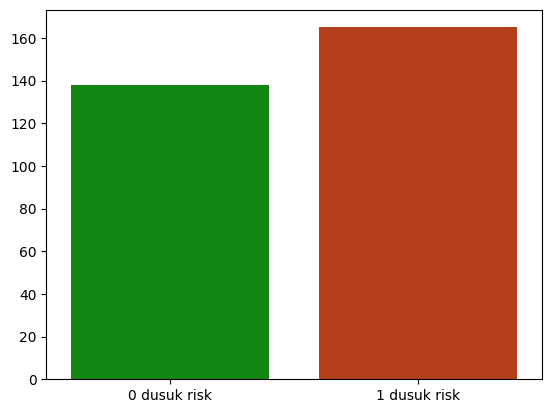

In [37]:
#veriler : output'un verileri 0'dan kac tane var. 1'den kac tane var
#labellar: 0 dusuk risk, 1 yuksek risk
#renkler w3schools
#barplot

veriler=DF.output.value_counts().sort_index().values
labellar=['0 dusuk risk','1 dusuk risk']
renkler=['#009900','#cc3300']
sns.barplot(x=labellar,y=veriler,palette=renkler)

In [ ]:
#kategorisel oznitelikler print et
#sayisal oznitelikler print et

In [38]:
#cinsiyet ile output'u cinsiyet'e gore grupla
s=DF[['sex','output']].groupby('sex')
s

In [39]:
#cinsiyet ile output'u cinsiyet'e gore gruplamanin ortalamasini al
s=DF[['sex','output']].groupby('sex').mean()
s


,output
sex,
0,0.750000
1,0.449275


In [40]:
#cinsiyet ile output'u cinsiyet'e gore gruplamanin ortalamasini al
#as_index False
s=DF[['sex','output']].groupby('sex',as_index=False).mean()
s

,sex,output
0,0,0.750000
1,1,0.449275


In [ ]:
#grouplama 1'e gore yuksek riske 

In [41]:
#her cinsiyetten kac adet var
t['sex']

sex
1    207
0     96
Name: count, dtype: int64

In [ ]:
#fbs

In [42]:
#fbs'de her degerden kac tane var
t['fbs']

fbs
0    258
1     45
Name: count, dtype: int64

In [43]:
#fbs ile output'u fbs'ye gore gruplamanin ortalamasini al
s=DF[['fbs','output']].groupby('fbs',as_index=False).mean()
s

,fbs,output
0,0,0.550388
1,1,0.511111


In [45]:
#exng'de her degerden kac tane var
t['exng']

exng
0    204
1     99
Name: count, dtype: int64

In [46]:
#exng ile output'u exng'ye gore gruplamanin ortalamasini al
s=DF[['exng','output']].groupby('exng',as_index=False).mean()
s

,exng,output
0,0,0.696078
1,1,0.232323


In [47]:
#caa'da her degerden kac tane var
t['caa']

caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [48]:
#caa ile output'u caa'ya gore gruplamanin ortalamasini al
s=DF[['caa','output']].groupby('caa',as_index=False).mean()
s

,caa,output
0,0,0.742857
1,1,0.323077
2,2,0.184211
3,3,0.150000
4,4,0.800000


In [49]:
#cp
#cp'de her degerden kac tane var
t['cp']

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [50]:
#cp ile output'u cp'ye gore gruplamanin ortalamasini al
s=DF[['cp','output']].groupby('cp',as_index=False).mean()
s

,cp,output
0,0,0.272727
1,1,0.820000
2,2,0.793103
3,3,0.695652


In [51]:
#age'de her degerden kac tane var
t['age']

age
58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: count, dtype: int64

In [52]:
#age ile output'u age'e gore gruplamanin ortalamasini al
s=DF[['age','output']].groupby('age',as_index=False).mean()
s

,age,output
0,29,1.000000
1,34,1.000000
2,35,0.500000
3,37,1.000000
4,38,0.666667
5,39,0.750000
6,40,0.333333
7,41,0.900000
8,42,0.875000
9,43,0.625000


In [53]:
#heart.csv DF icin columnlari gor
DF.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [54]:
#age sayisal oznitelik
#age'i kategorisel oznitelik'e cevir: cat_age
#cut ile age'i 4 esit parcaya bol
DF['cat_age']=pd.cut(DF['age'],4)
DF['cat_age']

0        (53.0, 65.0]
1      (28.952, 41.0]
2      (28.952, 41.0]
3        (53.0, 65.0]
4        (53.0, 65.0]
            ...      
298      (53.0, 65.0]
299      (41.0, 53.0]
300      (65.0, 77.0]
301      (53.0, 65.0]
302      (53.0, 65.0]
Name: cat_age, Length: 303, dtype: category
Categories (4, interval[float64, right]): [(28.952, 41.0] < (41.0, 53.0] < (53.0, 65.0] < (65.0, 77.0]]

In [55]:
#cat_age'de her degerden kac tane var
t={}
for i in DF.columns:
    t[i]= DF[i].value_counts()
t['cat_age']

cat_age
(53.0, 65.0]      142
(41.0, 53.0]       99
(65.0, 77.0]       33
(28.952, 41.0]     29
Name: count, dtype: int64

In [57]:
t['cat_age'].sort_index()


cat_age
(28.952, 41.0]     29
(41.0, 53.0]       99
(53.0, 65.0]      142
(65.0, 77.0]       33
Name: count, dtype: int64

In [58]:
#cat_age ile output'u cat_age'e gore gruplamanin ortalamasini al

s=DF[['cat_age','output']].groupby('cat_age',as_index=False).mean()
s

,cat_age,output
0,"(28.952, 41.0]",0.758621
1,"(41.0, 53.0]",0.686869
2,"(53.0, 65.0]",0.408451
3,"(65.0, 77.0]",0.515152


In [59]:
#thalachh sayisal oznitelik
#thalachh'i kategorisel oznitelik'e cevir: cat_thalachh
#cat_thalachh'da her degerden kac tane var
DF['cat_thalachh']=pd.cut(DF['thalachh'],4)
DF['cat_thalachh']

0      (136.5, 169.25]
1      (169.25, 202.0]
2      (169.25, 202.0]
3      (169.25, 202.0]
4      (136.5, 169.25]
            ...       
298    (103.75, 136.5]
299    (103.75, 136.5]
300    (136.5, 169.25]
301    (103.75, 136.5]
302    (169.25, 202.0]
Name: cat_thalachh, Length: 303, dtype: category
Categories (4, interval[float64, right]): [(70.869, 103.75] < (103.75, 136.5] < (136.5, 169.25] < (169.25, 202.0]]

In [60]:
#cat_thalachh ile output'u cat_thalachh'a gore gruplamanin ortalamasini al
s=DF[['cat_thalachh','output']].groupby('cat_thalachh',as_index=False).mean()
s

,cat_thalachh,output
0,"(70.869, 103.75]",0.100000
1,"(103.75, 136.5]",0.275362
2,"(136.5, 169.25]",0.571429
3,"(169.25, 202.0]",0.841270


In [ ]:
#cp, thalachh

In [ ]:
#fbs, caa, exng

In [ ]:
#catplot

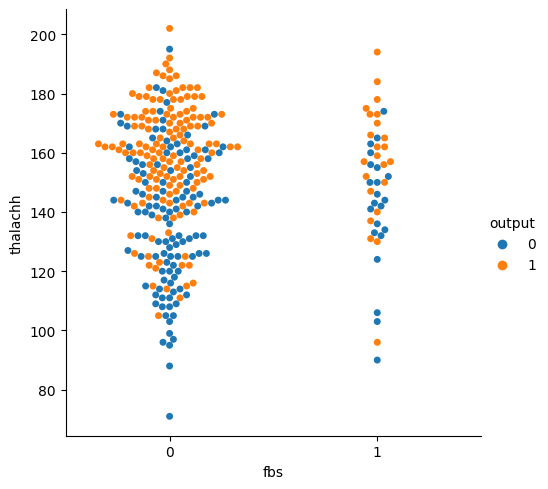

In [61]:
#seaborn
#catplot
#x : fbs
#y: thalachh
#kind swarm

sns.catplot(data=DF,
            x='fbs',
           y='thalachh',
           hue='output',
           kind='swarm')

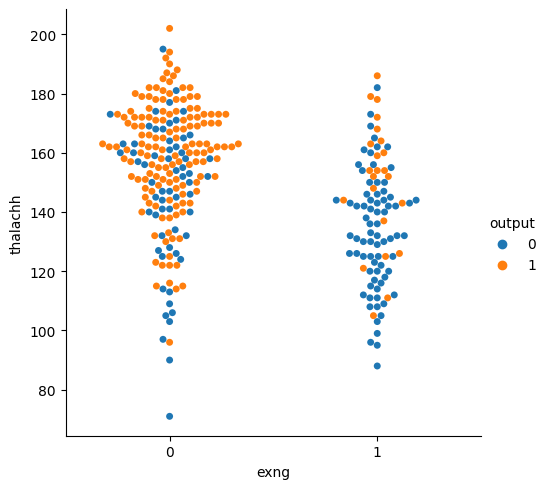

In [62]:
#seaborn
#catplot
#x : exng
#y: thalachh
#kind swarm

sns.catplot(data=DF,
            x='exng',
           y='thalachh',
           hue='output',
           kind='swarm')

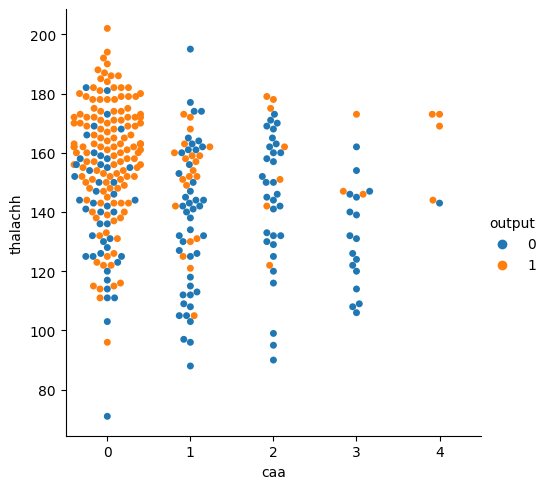

In [63]:
#seaborn
#catplot
#x : caa
#y: thalachh
#kind swarm

sns.catplot(data=DF,
            x='caa',
           y='thalachh',
           hue='output',
           kind='swarm')

In [64]:
#korelasyon
cor=DF.corr
cor

<bound method DataFrame.corr of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  ou

In [65]:
DF=DF.drop(columns=['cat_age','cat_thalachh'])
DF

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [68]:
#heart.csv DF columnlari yazdir
#cat_age ve cat_thalachh sutunlarini sil
#korelasyon al
#heatmap
#cmap=magma
cor=DF.corr()
cor

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<Axes: >

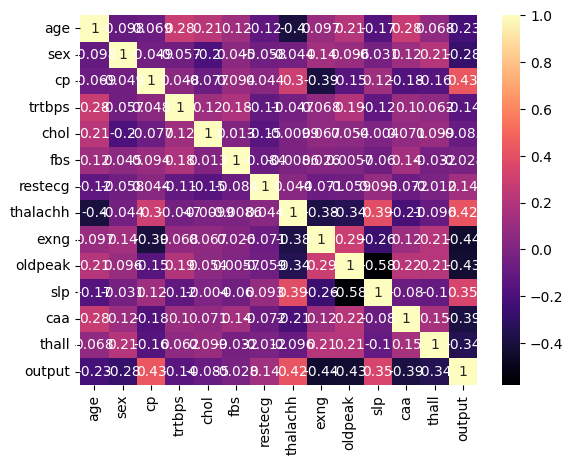

In [69]:
sns.heatmap(cor
            ,xticklabels=DF.columns,
           yticklabels=DF.columns,
           annot=True,
        cmap='magma')

In [ ]:
#cat_thalachh ve cat_age featurelarini sil


<Axes: >

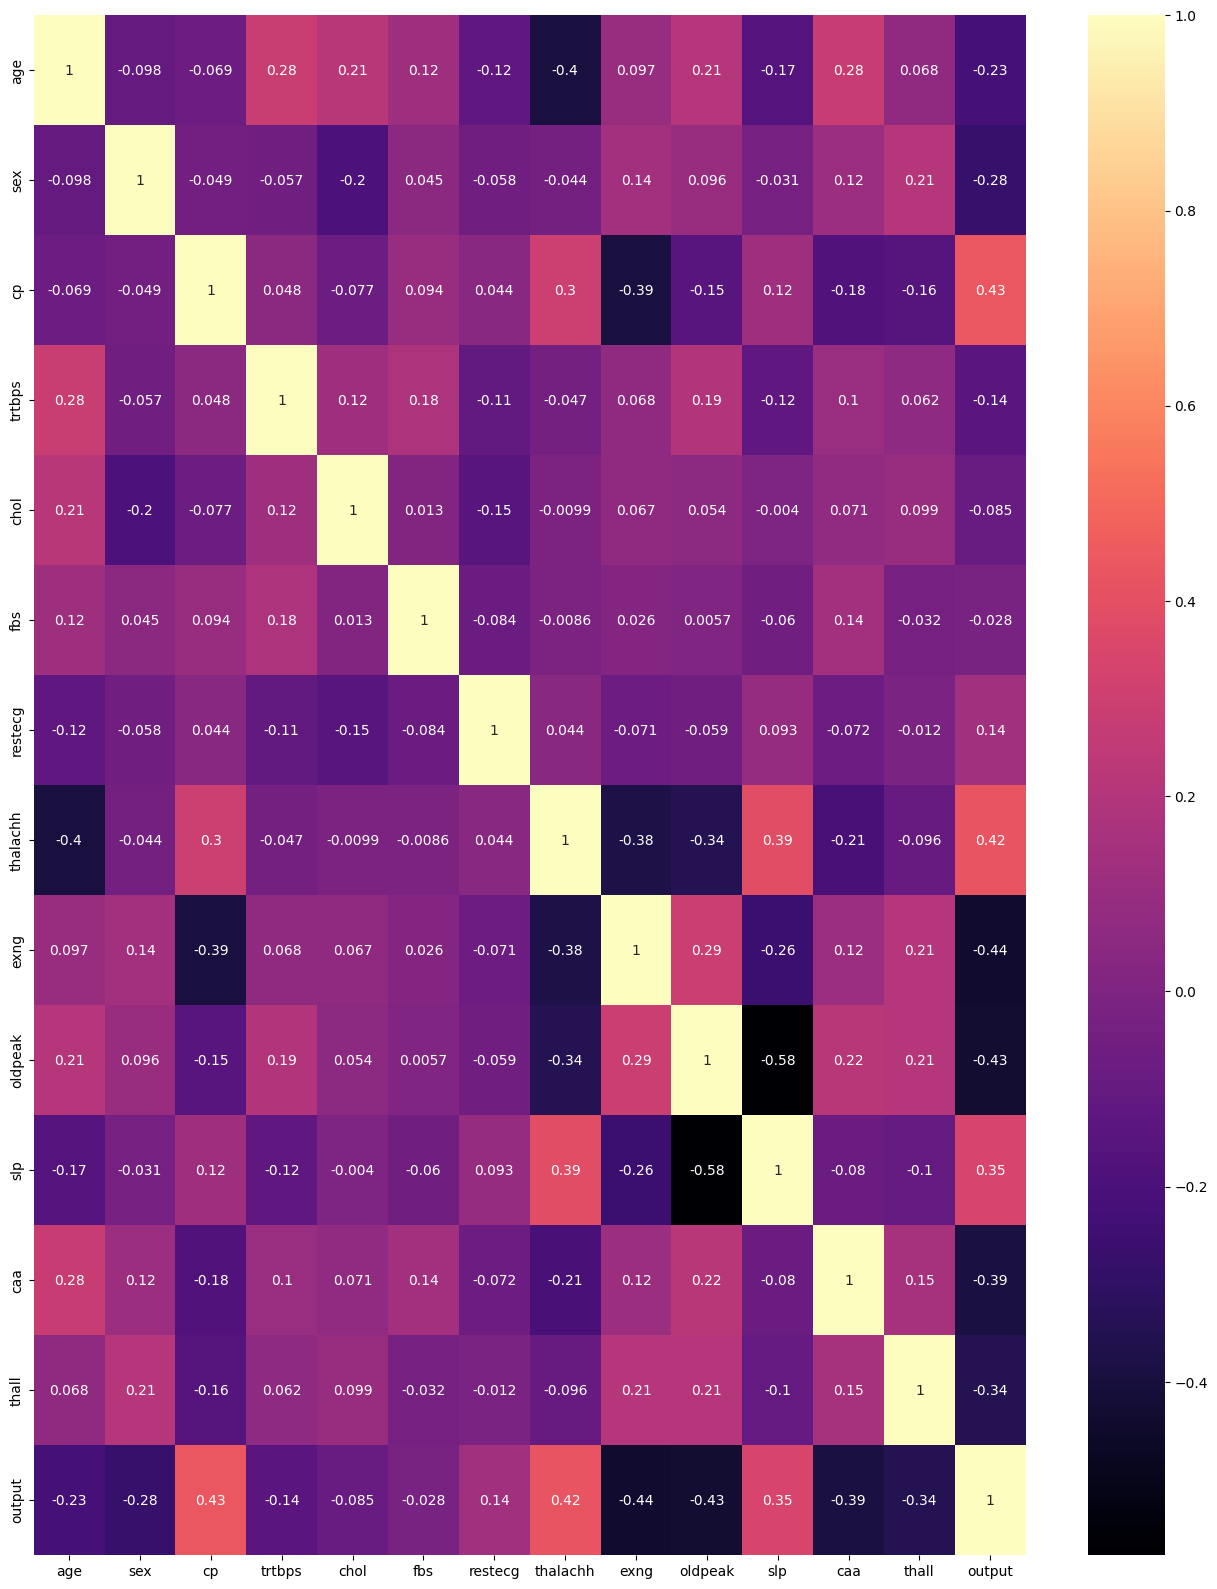

In [70]:
#heatmap
#korelasyon
plt.figure(figsize=(16,20))
sns.heatmap(cor
            ,xticklabels=DF.columns,
           yticklabels=DF.columns,
           annot=True,
        cmap='magma')


In [ ]:
#heatmap
#cmap=magma
#grafik boyut 16, 8
